# Test vrtáky

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bgr.shape (300, 400, 3)
pocet radku: 300
pocet sloupcu: 400


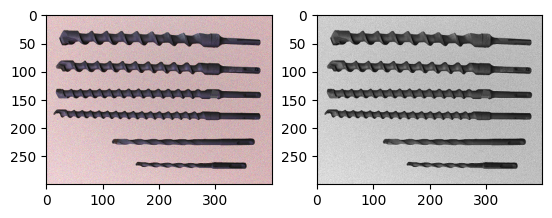

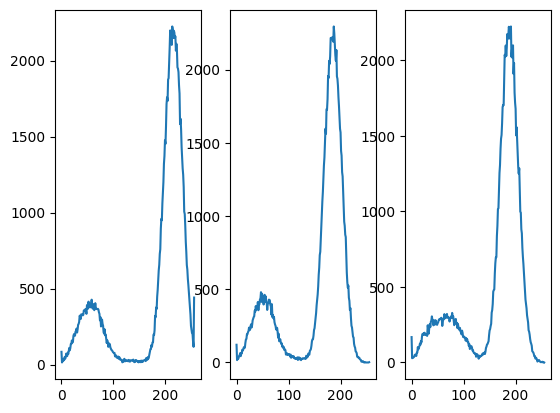

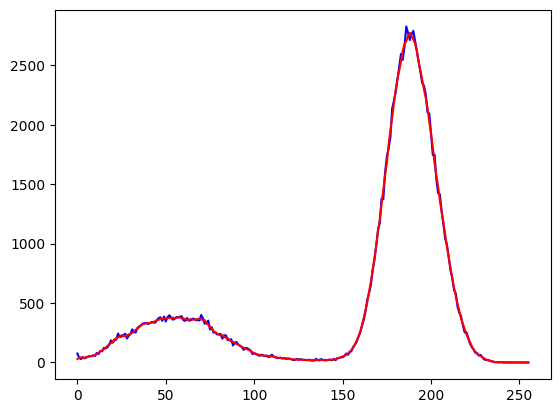

In [3]:
bgr = cv2.imread('cv01_obr.bmp')

# Vlastnost shape poli a matici numpy obsahuje jejich rozmery. bgr.shape je
# ntice (python tuple) udavajici pocet radku, pocet sloupcu, ..., v tomto
# poradi.
print('bgr.shape', bgr.shape)
print('pocet radku: {0}'.format(bgr.shape[0]))
print('pocet sloupcu: {0}'.format(bgr.shape[1]))


# Nyni prevedeme obrazek do stupnu sedi. To provedeme jako vazeny soucet
# jednotlivych kanalu. Jednotlive slozky ziskame podobne jako v Matlabu
# maticovym indexovanim. Zde bychom mohli pouzit take funkci OpenCV split:
# B, G, R = cv2.split(bgr).
B, G, R = bgr[:,:,0], bgr[:,:,1], bgr[:,:,2]
gray = 0.3*B + 0.59*G + 0.11*R

# Barevny a sedotonovy obrazek zobrazime vedle sebe. U barevneho obrazku je
# nutne obratit poradi kanalu, protoze funkce imshow() ocekava kanaly v poradi
# R, G, B, obrazek pritom mame ulozeny jako B, G, R. Funkce dstack spoji
# jednotlive slozky podel tretiho rozmeru, tzn. ze rgb bude opet 3d matice.
# dstack ocekava pouze jediny parametr typu ntice (tuple), proto je nutne
# R, G, B uzavorkovat - jinak by se intepretovalo jako 3 argumenty.
# Obdobne jako vyse, zde bychom mohli pouzit i funkci opencv merge:
# rgb = cv2.merge((R, G, B)).
plt.close('all')
rgb = np.dstack((R, G, B))
plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')

# Nyni vypocteme histogram jasovych hodnot pro kazdou slozku. K tomu si
# nadefinujeme specialni funkci, ktera bude jako argument prejimat matici a
# vracet rozlozeni cetnosti jejich hodnot.
color_range = 256
def histogram(x):
    # Nejprve inicializujeme pole cetnosti jasu na nuly.
    h = np.zeros(color_range)

    # Funkce range vrati seznam hodnot od nuly do zadaneho parametru (avsak
    # BEZ nej). Dvojitym for cyklem tejdy projdeme cely obrazek a pro kazdy
    # pixel pricteme +1 na odpovidajici pozici v histogramu.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            h[x[i,j]] += 1
    
    return h


# Nyni zobrazime histogramy pro kazdou slozku.
# Nejprve otevreme nove zobrazovaci okno (opetjako v jazyce Matlab).
plt.figure(2)
for i in range(3):
    h = histogram(bgr[:,:,2-i])
    
    # Histogramy zobrazime vedle sebe. 
    plt.subplot(1, 3, i+1)
    plt.plot(h)

# Jako posledni priklad si ukazeme vyhlazeni histogramu prostym prumerovanim.
# Histogram spocitame napr. ze sedotonoveho obrazku.
h = histogram(gray.astype(int))

# Zvolime sirku vyhlazovani K.
K = 2

# Vyhlazeny histogram ulozime do pole g. To nejprve inicializujeme na nulu.
g = np.zeros(h.shape[0])

# Do i-teho pole v g ulozime soucet prvku h[i-K:i+K] a vydelime poctem.
for i in range(h.shape[0]):
    g[i] = 0.
    # Opet: range(odkud, kam) nebude obsahovat koncovy bod.
    for j in range(-K, K+1):
        # Okrajove podminky osetrime jednoradkovym zapisem podminky if.
        g[i] += h[i+j] if i+j >= 0 and i+j < h.shape[0] else 0
    g[i] /= 2*K+1

# Histogramy zobrazime pres sebe - puvodni modre, vyhlazeny cervene.
plt.figure(3)
plt.plot(h, '-b')
plt.plot(g, '-r')
plt.show()